# Laurrel Gaussian Transform


In [26]:
 !pip install numpy

Defaulting to user installation because normal site-packages is not writeable


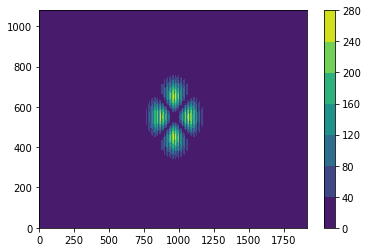

In [14]:
import numpy as np
from cmath import phase
from math import factorial
from scipy.special import assoc_laguerre as lg
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
w0=100 # Waist Beam
P = 0  # Radial Index
LG = [
    (2,np.sqrt(5/80)),
    (-2,np.sqrt(5/80)),
    (3,np.sqrt(0/80)),
    (4,np.sqrt(0/80)),
    (0,np.sqrt(0/105)),
    ]
WIDTH  = 1920 # HARDCODED
HEIGHT = 1080 # HARDCODED

def getAxis(magnitute,shift):
    return np.linspace(-1*magnitute/2+shift,magnitute/2+shift-1,magnitute)
def car2polar(x,y):
    rho = np.hypot(x,y)
    phi = np.arctan2(y, x)
    return rho, phi
def Lpl(x,l,p):
    value = 0
    for i in range(p+1):
        value = value+((-1)**(i))*factorial(p+abs(l))/factorial(p-i)/factorial(abs(l)+i)/factorial(i)*x**i
    return value
def N_PL(p,l):
    return np.sqrt(factorial(p)/factorial(p+abs(l)))
def lagurrelGussian(rho,phi,w,l,p):
    # res = ((-1)**p)* np.sqrt( 2*factorial(p)/w/w/factorial(p+abs(l)))*((np.sqrt(2)*rho)**abs(l))
    # c=1.5
    # x=(rho/(w/c))**2
    # res = res* ( np.exp(1j*l*phi) * Lpl(2*x,l,p) * np.exp((-1*(rho/w))**2))
    # return res
    # return lg(2*((rho/w)**2),p,l)*np.exp(-1*((rho/w)**2))*np.exp(-1j*l*phi)*((np.sqrt(2)*rho/w)**abs(l))
    rho2w = rho/w
    return N_PL(p,l)*np.power(np.sqrt(2)*rho2w,abs(l))*lg(2*np.power(rho2w,2),p,abs(l))*np.exp(-1*np.power(rho2w,2))*np.exp(complex(0,-1)*l*phi)

x, y     = getAxis(WIDTH,-10),getAxis(HEIGHT,-10)
xv, yv   = np.meshgrid(x,y)
rho, phi = car2polar(xv,yv)
# c=1.5
# q= (rho/(w0/c))**2
# out = lpl(2*q,LG[0],P)
out  = 0
for m,n in LG:
    temp = n*lagurrelGussian(rho,phi,w0,m,P)
    out += temp
    
amp   = np.absolute(out)
phase = np.angle(out)
amp=amp/np.amax(amp)
phase_mod = (phase+2*np.pi*xv/20) % (2*np.pi)  
# phase_mod = np.fmod(phase-2*np.pi*xv/5,2*np.pi)  
res = amp*phase_mod
res8bit = res/res.max()*255
# if out == lagurrelGussian(rho,phi,w0,LG[0][0],P)*np.sqrt(5/80):print(True)
# print (out)
fig = plt.figure()
# plt.contourf(out)
# out = np.angle(lagurrelGussian(rho,phi,w0,LG[0][0],P),deg=True)
# plt.contourf(np.angle(lagurrelGussian(rho,phi,w0,LG[0][0],P)))
plt.contourf(res8bit)
plt.colorbar()
plt.show()
